In [88]:
# LIBRARIES #
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import io
import sklearn
import sklearn.metrics  as metrics
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, KFold, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [89]:
# READ CSV #
warnings.filterwarnings('ignore')
data = pd.read_csv('/content/student-por.csv', sep=",")

In [90]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [91]:
# FIRST APPROACH TO THE DATASET #

# columns names #
data_names = ['school', 'sex', 'age', 'address', 'family_size', 'parent_cohabition_status', 'mother_education', 'father_education','mother_job', 'father_job', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'school_support', 'family_support', 'paid', 'extra_curricular_activities', 'nursery', 'higher', 'internet_access', 'romantic', 'famrel', 'freetime', 'going_out', 'workday_alcohol', 'weekend_alcohol', 'health', 'absences','grade_period1', 'grade_period2', 'final_grade' ]
data.columns = data_names

# numerical vs categorical columns #
numerical_columns = ['age', 'mother_education', 'father_education', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'going_out', 'workday_alcohol', 'weekend_alcohol', 'health', 'absences', 'final_grade']
categorical_columns = ["school","sex",'address', 'family_size', 'parent_cohabition_status','mother_job', 'father_job', 'reason', 'guardian',"school_support", "family_support",'paid', 'extra_curricular_activities', 'nursery', 'higher', 'internet_access', 'romantic']


In [92]:
# CLEAN THE DATABASE # 

# 1. Drop the columns that we are not going to use.
data_clean = data.drop(['grade_period1', 'grade_period2'], axis=1)

# 2. Drop na's.
# data_clean=data_clean.dropna(inplace=True)

In [93]:
# CLEAN THE DATABASE # 

# 3. Get the dummies so that it is easier to work. 
# This is, transform the categorical columns into numerical ones. 
data_clean = pd.get_dummies(data_clean, columns=categorical_columns)

# 4. Transform the data. 
# we need to standarize the data to take into consideration variations in measurments, units and scales. 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_clean[numerical_columns])
scaled_dataframe = pd.DataFrame(scaled_data, columns = numerical_columns)  
scaled_dataframe.head()

for column in numerical_columns:
  data_clean.append(scaled_dataframe[column])
  data_clean[column] = scaled_dataframe[column]

In [94]:
# LINEAR REGRESSION #

# 1. Split into training and testing data.
boolean_mask = data_clean.columns.isin(['age', 'mother_education', 'father_education', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'going_out',
       'workday_alcohol', 'weekend_alcohol', 'health', 'absences', 'grade_period1', 'grade_period2', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'family_size_GT3', 'family_size_LE3', 'parent_cohabition_status_A', 'parent_cohabition_status_T', 'mother_job_at_home', 'mother_job_health',
       'mother_job_other', 'mother_job_services', 'mother_job_teacher', 'father_job_at_home', 'father_job_health', 'father_job_other','father_job_services', 
       'father_job_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 
       'school_support_yes','family_support_yes', 'paid_yes', 'extra_curricular_activities_yes', 'nursery_yes', 'higher_yes', 'internet_access_yes','romantic_yes'])
sc = data_clean.columns[boolean_mask]
X=data_clean[sc]

boolean_mask_target = data_clean.columns.isin(["final_grade"])
s = data_clean.columns[boolean_mask_target]
y=data_clean[s]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 2. Fit the model, get the prediction and get the accuracy.
linear_model=LinearRegression()
linear_model.fit(X_train, y_train)
print("Linear regression:")

y_pred = linear_model.predict(X_train)

print("Accuracy:", linear_model.score(X_test,y_test))   # linear_model.score uses R-squared metric by default

mse_tot = mean_squared_error(y_train, y_pred)  

print("Mean squared error: %.10f" % mse_tot)  

# 3. Get the coefficients of the regression model:
coefficient={}
for coef, feat in zip(linear_model.coef_,X.columns):
  coefficient[feat]=coef


Linear regression:
Accuracy: 0.24907719176742693
Mean squared error: 0.6756022468


In [95]:
y_pred_rescaled = y_pred * data["final_grade"].std() + data["final_grade"].mean()
# print(y_pred_rescaled)   # these are the predicted grades in their original form
print("\n", "Mean of predicted grades:", y_pred_rescaled.mean())

# Our model predicts a slightly lower mean of the grades than in database. 


 Mean of predicted grades: 11.874204554740695


In [82]:
"""x = np.arange(-4, 4, 1)
plt.scatter(y_test, y_pred)
plt.plot(x, x, color='m')
plt.xlabel("Actual final grade")
plt.ylabel("Predicted final grade")
plt.title("Actual vs. predicted final grade, Linear regression model")
plt.grid(0.5); plt.show()"""

'x = np.arange(-4, 4, 1)\nplt.scatter(y_test, y_pred)\nplt.plot(x, x, color=\'m\')\nplt.xlabel("Actual final grade")\nplt.ylabel("Predicted final grade")\nplt.title("Actual vs. predicted final grade, Linear regression model")\nplt.grid(0.5); plt.show()'

In [96]:
# Creates a function to determine which will be the best alpha value for Lasso regression in following cell.
alphas = np.arange(0,1,0.001).tolist()
def best_alpha(X, y, alpha_values=alphas):
    """
    Here we can test which the best alpha value is, using cross-validation for Lasso model.

    X is a feature matrix and y is a target vector. We will test all alpha values in the list of alpha values.
    """
    
    lasso = LassoCV(alphas=alpha_values, cv=5, random_state=42)
    lasso.fit(X, y)
    
    best_alpha = lasso.alpha_
    
    return best_alpha

In [97]:
# LASSO REGRESSION #

# 1. Split into training and testing data.
boolean_mask = data_clean.columns.isin(['age', 'mother_education', 'father_education', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'going_out',
       'workday_alcohol', 'weekend_alcohol', 'health', 'absences', 'grade_period1', 'grade_period2', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'family_size_GT3', 'family_size_LE3', 'parent_cohabition_status_A', 'parent_cohabition_status_T', 'mother_job_at_home', 'mother_job_health',
       'mother_job_other', 'mother_job_services', 'mother_job_teacher', 'father_job_at_home', 'father_job_health', 'father_job_other','father_job_services', 
       'father_job_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 
       'school_support_yes','family_support_yes', 'paid_yes', 'extra_curricular_activities_yes', 'nursery_yes', 'higher_yes', 'internet_access_yes','romantic_yes'])
sc = data_clean.columns[boolean_mask]
X=data_clean[sc]

boolean_mask_target = data_clean.columns.isin(["final_grade"])
s = data_clean.columns[boolean_mask_target]
y=data_clean[s]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 2. Fit the model and get the accuracy.
best_alpha_for_lasso = best_alpha(X_train, y_train)
print("The alpha value we will use is:", best_alpha_for_lasso)
lasso_model=Lasso(alpha=best_alpha_for_lasso)
lasso_model.fit(X_train, y_train)

# 3. Make the predictions.
y_pred = lasso_model.predict(X_test)


# 4. Get the slope and the intercept. 
# y = mx + b, where m represents the slope and b represents the y-intercept.
print("Slope",lasso_model.coef_[0])
print("Intercept:",lasso_model.intercept_)
print("\n")

# 5. Evaluate the performance of our model
# Method 1: mean squared error
# Disadvantage it's difficult to evaluate the performance of the model using MSE as the value of MSE can vary from 0 to any larger number
mse = mean_squared_error(y_test,y_pred)
print("Mean squared error:", mse)

# Method 2: R2.
# The value of R2 varies between 0 and 1. 
r2=lasso_model.score(X_test,y_test)

print("R2:",r2)


# 6. Get Lasso coefficients and select a few features to improve the model accuracy
sel = SelectFromModel(lasso_model)
removed_features = X_train.columns[(sel.estimator.coef_ == 0).ravel().tolist()]
chosen_features = X_train.columns[(sel.estimator.coef_ != 0).ravel().tolist()]

print("\n", chosen_features)


The alpha value we will use is: 0.007
Slope 0.06453538775793585
Intercept: [-0.6546022]


Mean squared error: 0.6046667401327356
R2: 0.31466091362027004

 Index(['age', 'mother_education', 'father_education', 'traveltime',
       'studytime', 'failures', 'famrel', 'freetime', 'going_out',
       'workday_alcohol', 'weekend_alcohol', 'health', 'absences', 'school_GP',
       'school_MS', 'sex_F', 'sex_M', 'address_R', 'family_size_GT3',
       'family_size_LE3', 'parent_cohabition_status_A',
       'parent_cohabition_status_T', 'mother_job_at_home', 'mother_job_health',
       'mother_job_other', 'father_job_services', 'father_job_teacher',
       'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'school_support_yes', 'paid_yes',
       'extra_curricular_activities_yes', 'nursery_yes', 'higher_yes',
       'internet_access_yes', 'romantic_yes'],
      dtype='object')


In [98]:
# LASSO REGRESSION AFTER FEATURE SELECTION #

boolean_mask = data_clean.columns.isin(chosen_features.tolist())
sc = data_clean.columns[boolean_mask]
X=data_clean[sc]

boolean_mask_target = data_clean.columns.isin(["final_grade"])
s = data_clean.columns[boolean_mask_target]
y=data_clean[s]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 2. Fit the model and get the accuracy.
# best_alpha_for_lasso = best_alpha(X_train, y_train)
# print("The alpha value we will use is:", best_alpha_for_lasso)
lasso_model=Lasso(alpha=best_alpha_for_lasso)
lasso_model.fit(X_train, y_train)

# 3. Make the predictions.
y_pred = lasso_model.predict(X_test)

# 4. Get the slope and the intercept. 
# y = mx + b, where m represents the slope and b represents the y-intercept.
print("Slope",lasso_model.coef_[0])
print("Intercept:",lasso_model.intercept_)
print("\n")

# 5. Evaluate the performance of our model
# Method 1: mean squared error
# Disadvantage it's difficult to evaluate the performance of the model using MSE as the value of MSE can vary from 0 to any larger number
mse = mean_squared_error(y_test,y_pred)
print("Mean squared error:", mse)

# Method 2: R2.
# The value of R2 varies between 0 and 1. 
r2=lasso_model.score(X_test,y_test)
print("R2:",r2)


Slope 0.0
Intercept: [-0.61844332]


Mean squared error: 0.8318064698922608
R2: 0.06358098637552789


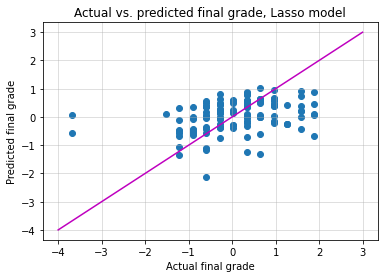

In [99]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual final grade")
plt.ylabel("Predicted final grade")
plt.plot(x, x, color='m')
plt.title("Actual vs. predicted final grade, Lasso model")
plt.grid(alpha=0.5); plt.show()

In [100]:
y_pred_rescaled = y_pred * data["final_grade"].std() + data["final_grade"].mean()
# print(y_pred_rescaled)   # these are the predicted grades in their original form
print("\n", "Mean of predicted grades:", y_pred_rescaled.mean())


 Mean of predicted grades: 12.116955025579795
